# Multimedia Data Compression

### Why to compress?

* Data compression can reduce the memory requirements of (almost) any kind of
  information source.

### Which data?

* Mainly ... audio, image, and video signals.

### Why these sources?

* After the digitalization of any signal we get a sequence $s[]$
  of samples that represent the signal $s$ with more or less fidelity.
  
* Usually, $s[]$ is encoded using PCM (Pulse Code Modulation), in which
  every sample $s[i]$ is represented with the same number of bits.
  
* Most digital PCM signals are memory demanding. For
  example, in a CD we have a data-rate of
  
\begin{equation}
    (16+16)\frac{\text{bits}}{\text{sample}}\times
    44{.}100\frac{\text{samples}}{\text{second}}=
    1{.}411{.}200\frac{\text{bits}}{\text{second}}.
\end{equation}
  
* Image and video signals require much more memory.

### Lab (audio comparison)

TO-DO

Compress a WAV audio file to MP3 with LAME at 128 kbps. Decompress to obtain again a WAV file. Substract the original and the decompressed WAVs and listen it.

### Lab
Compare two images, a original and a decompressed one.

In [1]:
!pwd
!if [ ! -f Homer.png ]; then \
  echo Homer.png not found; \
  wget http://www.hpca.ual.es/~vruiz/images/Homer.png; \
else \
  echo "Homer.png found :-)"; \
fi

/Users/vruiz/Multimedia_Systems
Homer.png not found
--2018-03-09 18:29:55--  http://www.hpca.ual.es/~vruiz/images/Homer.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 374512 (366K) [image/png]
Grabando a: “Homer.png”

Homer.png           100%[===================>] 365,73K  1,63MB/s    en 0,2s    

2018-03-09 18:29:56 (1,63 MB/s) - “Homer.png” guardado [374512/374512]



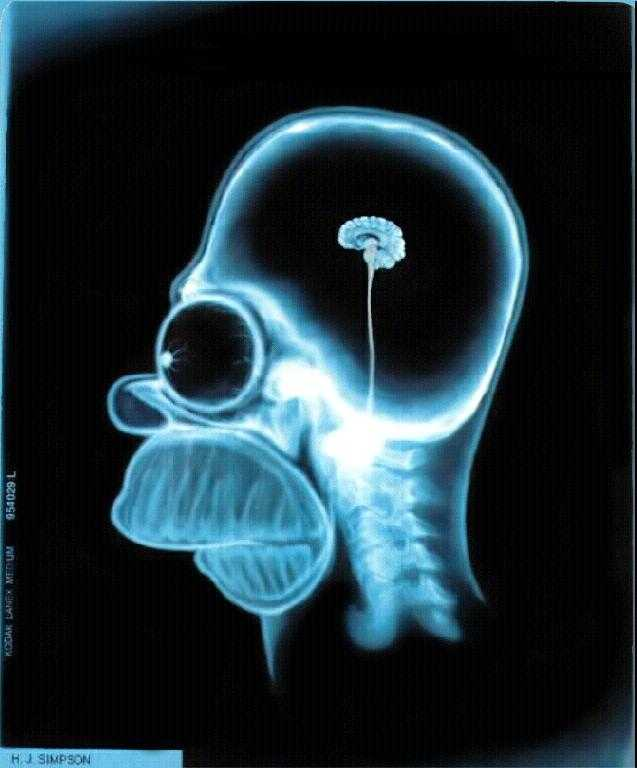

In [2]:
import IPython
#from IPython.display import Image
IPython.display.Image("Homer.png")

In [2]:
!echo `wc -c < Homer.png` bytes

374512 bytes


In [1]:
!convert -quality 40 Homer.png Homer.jp2
!convert Homer.jp2 Homer_jp2.png

# Note: in OSX, install imagemagick with: "brew install imagemagick --with-openjpeg"

# Note: in Debian's, install with:
#
# sudo apt-get remove imagemagick
# sudo apt-get install pkg-config
# sudo apt-get install libjpeg-dev
# sudo apt-get install libpng-dev
# sudo apt-get install libopenjp2-7-dev
# sudo apt-get install libx11-dev
# sudo apt-get install build-essential
# sudo apt-get build-dep imagemagick -y
# wget http://www.imagemagick.org/download/ImageMagick.tar.gz
# tar xzvf ImageMagick.tar.gz
# cd ImageMagick<tab>
# ./configure --with-openjp2=yes --with-png=yes --with-jpeg=yes --with-x=yes
# Revise in the configure's output that the required delegates has been seen by ImageMagick.
# make
# sudo make install
#
# PATH=$PATH:/usr/local/bin
# convert --version
# # if error:
# sudo ldconfig /user/local/lib
#
# identify -list format | grep -i JP2
#      JP2* rw-   JPEG-2000 File Format Syntax (2.1.0)

In [ ]:
IPython.display.Image("Homer_jp2.png")

In [5]:
!echo `wc -c < Homer.jp2` bytes

390736 bytes


In [7]:
# Be sure that: "pip install pillow" was run
from PIL import Image, ImageChops, ImageOps

In [9]:
orig = Image.open('Homer.png')
comp = Image.open('Homer_jp2.png')
diff = ImageChops.subtract(orig, comp)
diff = ImageOps.equalize(diff)
diff.save('diff.png')

In [ ]:
IPython.display.Image("diff.png")

## Memory requirements of PCM video

* In RGB (PCM) video, each color pixel need at least 24 bpp (bits/pixel).

* The memory requirements of RGB video are enormous. For example, an hour of $640\times 480\times 25$ Hz true-color of PCM video needs:

\begin{equation}
    25\frac{\text{images}}{\text{second}}\times
    640\cdot 480\frac{\text{pixels}}{\text{image}}\times
    24\frac{\text{bits}}{\text{pixel}}=
    184{.}320{.}000\frac{\text{bits}}{\text{second}}
\end{equation}

\begin{equation}
    184{.}320{.}000\frac{\text{bits}}{\text{second}} \times
    3{.}600\frac{\text{seconds}}{\text{hour}} \times
    \frac{1~\text{G}}{1{.}024^3}\times
    \frac{1~\text{byte}}{8~\text{bits}} \approx
    77~\text{Gbytes}
\end{equation}

* Video coding techniques should be used to compress this data. Most of these techniques are bases on Block-based Motion Estimation.

### Redundancy in signals

In general, signals has three types of redundancy:
    
   1. **Spatial/temporal redundancy**: Produced by similarities between
    adjacent (in 2D and 3D) samples. It can be removed using
    spatial/temporal models of the signal, generating [*lossless
    codecs*](https://en.wikipedia.org/wiki/Lossless_compression). These codecs are known as lossless *audio*, *image*, and *video* codecs.
    
   2. **Statistical redundancy**: Spatial/temporal redundancy generates *probabilistic relationships* among samples. Statistical redundancy can be removed by using
    probabilistic models, producing also *lossless codecs*. These
    codecs are known as *text codecs* because can be used to compress text sources.
    
   3. **Psychological redundancy**: Part of the information that
    signals carry can not be perceived by humans. [*Lossy codecs*](https://en.wikipedia.org/wiki/Lossy_compression) remove
    this kind of pseudo-redundancy, basically, by means of [quantization](https://en.wikipedia.org/wiki/Quantization_(signal_processing). Lossy codecs removes irrelevancy based on some perceptual criteria.
    


### Some interesting compression insights

* Lossless compressors are [bijective functions](https://en.wikipedia.org/wiki/Bijection) which find a different output for each possible input. For this reason, text compressors are lossless by definition.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/200px-Bijection.svg.png" width="200">

* Lossy compressors are [surjective functions](https://en.wikipedia.org/wiki/Surjective_function) and therefore, two or more inputs can produce the same output. There are lossless audio, image, and video compressors, but most of them are lossy (although some of them can be lossless if quantization is not used).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Surjection.svg/220px-Surjection.svg.png" width="200">
